<a href="https://colab.research.google.com/github/ratfarts/datasciencecoursera/blob/master/Copy_of_brand_analysis_session_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/datacamp/r-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

# **Brand Analysis Using Social Media Data in R**

Welcome to this hands-on training where you will learn how to perform brand analysis from social media data using R. We will be using different R libraries to analyze twitter data and derive insights.

In this session, you will learn

* How to compare brand popularity by extracting and comparing follower counts
* How to promote a brand by identifying popular tweets
* How to evaluate brand salience and compare the same for two brands using tweet frequencies
* Understand brand perception through text mining and by visualizing key terms
* Perform sentiment analysis to understand customer's feelings and sentiments about a brand


## **The Dataset**

The datasets to be used in this training session are in CSV format. These datasets comprise extracted live tweets using `rtweet` library. The datasets are:
* **users_twts.csv**: User data of four twitter accounts pre-extracted from Twitter
* **tesladf.csv**: Tweets searched on keyword 'tesla' pre-extracted from Twitter
* **toyotadf.csv**: Tweets searched on keyword 'toyota' pre-extracted from Twitter
* **tesla_small.csv**: Tweets searched on keyword 'tesla' pre-extracted from Twitter. This is a smaller dataset with fewer tweets.


Note that we will not be extracting live tweets from Twitter during this session as it invovles a setup process. We will be using pre-extracted tweets saved in CSV format.

- **users_twts.csv**: has 4 records and 90 columns of user data and associated metadata
- **tesladf.csv**: has 17979 records (tweets) and 90 columns of tweet text and associated metadata
- **toyotadf.csv**: has 17798 records (tweets) and 90 columns of tweet text and associated metadata
- **tesla_small.csv**: has 500 records (tweets) and 90 columns of tweet text and associated metadata

All the datasets have the same set of columns and some of the important columns that we will work with are listed below:

- `created_at`: UTC time when this Tweet was created
- `screen_name`: The screen name or twitter handle that an user identifies themselves with
- `text`: The actual tweet text posted by an user
- `retweet_count`: Number of times a given tweet has been retweeted.
- `followers_count`: The number of followers a twitter account currently has.

## **Getting started and installing packages**

In [2]:
# Install R packages
system('apt-get install r-cran-httpuv r-cran-rtweet r-cran-reshape r-cran-qdapregex r-cran-tm r-cran-qdap')
install.packages('syuzhet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshape’, ‘zoo’, ‘dtt’




## **1. Compare brand popularity by extracting and comparing follower counts**

We can compare followers count for competing products by using their screen names and follower counts.

Note:
- `screen_name`: The screen name or twitter handle that an user identifies themselves with.
- `followers_count`: The number of followers a twitter account currently has.

The followers count for a twitter account indicates the popularity of that account and is a measure of social media influence.

To extract user data directly from twitter, we usually load the `rtweet` package, obtain and create Twitter API access tokens according to the instructions in this [article](https://rtweet.info/articles/auth.html) and extract user data with the `lookup_users()` function which takes screen names as input and extracts user data from twitter accounts.

```R
# Store name of users to extract data on twitter accounts of 4 auto magazines
users <- c("caranddriver", "motortrend", "autoweekUSA", "roadandtrack")

# Extract user data for the twitter accounts stored in users
users_twts <- lookup_users(users)

# Save extracted data as a CSV file using `fwrite()` from`data.table` library
fwrite(users_twts, file = "users_twts.csv")
```

To avoid setting up individual API access tokens, we will be directly using a CSV file.

In [3]:
# Load rtweet library
library(rtweet)

Import the pre-saved CSV file with extracted user data for the four twitter accounts


---



In [4]:
# Import extracted user data from the csv file into a dataframe
users_twts = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/users_twts.csv?raw=true")

In [5]:
# View dimensions of the dataframe
dim(users_twts)

# View few rows of the dataframe
head(users_twts)

[1]  4 90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,14342661,1.272359e+18,2020-06-15T02:45:02Z,CARandDRIVER,1000-hp Hellephant-powered @Dodge Demon rolls onto dyno in video: https://t.co/fj18FvEVBl https://t.co/XyIngamybg,SocialFlow,NA,NA,NA,NA,⋯,33485,3666,2008-04-09T15:39:55Z,TRUE,http://t.co/uMTUR3UJQh,http://www.caranddriver.com,NA,https://pbs.twimg.com/profile_banners/14342661/1589386475,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/905461745178816514/goEtq5xZ_normal.jpg
2,25383000,1.271872e+18,2020-06-13T18:27:21Z,MotorTrend,Today is the day! Lights are green for the @24hoursoflemans Virtual! 🏁 🏎 Get all the LIVE coverage right here! https://t.co/GE6bAEbN3R,Twitter for iPhone,NA,NA,NA,NA,⋯,41567,2914,2009-03-19T20:53:09Z,TRUE,,,NA,https://pbs.twimg.com/profile_banners/25383000/1591290185,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1268290610642841606/tmgqtz8r_normal.jpg
3,72861485,1.272401e+18,2020-06-15T05:32:05Z,AutoweekUSA,Ford switched from Tremec to Getrag for its Mustang manual transmissions back in 2011; a new class action lawsuit c… https://t.co/8U1LTxJA8X,SocialFlow,NA,NA,NA,NA,⋯,42962,907,2009-09-09T14:14:49Z,TRUE,https://t.co/vmRBIAd2qP,http://www.autoweek.com,NA,https://pbs.twimg.com/profile_banners/72861485/1576699667,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1207392025269719041/hLqoPr0A_normal.jpg
4,21200953,1.272220e+18,2020-06-14T17:31:06Z,RoadandTrack,Watch a bunch of Safari 911s frolic through the snow on a frozen lake. https://t.co/6WacyUrnzW https://t.co/tfUAvfe0J7,SocialFlow,NA,NA,NA,NA,⋯,45268,468,2009-02-18T14:38:00Z,TRUE,http://t.co/MOF3c631Tk,http://www.roadandtrack.com,NA,https://pbs.twimg.com/profile_banners/21200953/1544480352,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/845016711292071936/ZqE0j-8u_normal.jpg


From the user data, extract details of screen names and follower counts for the 4 twitter accounts into a dataframe.

In [6]:
# Create a data frame of screen names and followers counth
users_df <- users_twts[, c("screen_name", "followers_count")]

In [7]:
# Display and compare the follower counts for the 4 twitter accounts
users_df

screen_name,followers_count
<fct>,<int>
CARandDRIVER,1089921
MotorTrend,739800
AutoweekUSA,164567
RoadandTrack,659062


#### We can see that "Car and Driver" is the most popular automobile magazine with number of followers exceeding a million and it is followed by "Motor Trends" with 739,800 followers. 

#### An automobile brand advertising for a new model can place its adverts on the homepage of these twitter acocunts or tag these twitter accounts while promoting its brand. 

#### Thus, Digital marketers can position ads on popular twitter accounts for increased visibility.

---
<center><h1> Q&A 1</h1> </center>

---


## **2. Promote a brand by identifying popular tweets using retweet counts**

To extract tweet data for a particular term, we can use the `search_tweets()` function from `rtweet` library which has the following arguments:

*	`q`: The query being used, for example `"tesla"`

*	`n`: The number of tweets

*	`lang`: The language of the tweet - here set to `"en"`

*	`include_rts`: A boolean value that either accepts the inclusion of retweets or not on resulting data

In this notebook, we will be using a CSV file to import the tweets but using `search_tweets()` to extract tweets on `"tesla"` can be done as such.

```R
# Extract 18000 tweets on Tesla
tweets_tesla = search_tweets("tesla", n = 18000, lang = "en", include_rts = FALSE)

fwrite(tweets_tesla, "tesladf.csv")
```


In [8]:
# Import extracted tweets on "tesla" in CSV format into a dataframe
tesladf = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/tesladf.csv?raw=true")

In [10]:
# Explore the tweet dataframe
dim(tesladf)
head(tesladf)

[1] 17979    90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,1.016807e+18,1.262241e+18,2020-05-18T04:36:31Z,1LoafOfMeat,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,Twitter for Android,73,1.262107e+18,9.889751e+17,BLKMDL3,⋯,433,8164,2018-07-10T22:10:02Z,FALSE,,,NA,,,http://pbs.twimg.com/profile_images/1104867316322521091/2n_rsTF1_normal.jpg
2,1.198000e+18,1.262241e+18,2020-05-18T04:36:17Z,2beaux,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",Twitter for iPad,149,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
3,1.198000e+18,1.262240e+18,2020-05-18T04:32:08Z,2beaux,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",Twitter for iPad,277,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
4,1.198000e+18,1.262218e+18,2020-05-18T03:04:49Z,2beaux,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",Twitter for iPad,214,1.262217e+18,2.323148e+09,Miss_Violet2014,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
5,1.198000e+18,1.262163e+18,2020-05-17T23:28:26Z,2beaux,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",Twitter for iPad,186,1.262131e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
6,1.198000e+18,1.262198e+18,2020-05-18T01:47:00Z,2beaux,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,Twitter for iPad,199,1.262198e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg


Extract the columns `retweet_count` and `text` and save to a new dataframe

In [12]:
# Create a data frame of tweet text and retweet count
rtwt <- tesladf[, c("text", "retweet_count")]
# View few rows of the new dataframe
head(rtwt)

,text,retweet_count
,<fct>,<int>
1,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,0
2,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",0
3,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",0
4,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",0
5,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",0
6,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,0


Sort in descending order of the retweet counts using `arrange()` from `dplyr` library

In [13]:
# Import library
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [14]:
# Sort data frame based on descending order of retweet counts
rtwt_sort <- arrange(rtwt, desc(retweet_count))

# View sorted output
head(rtwt_sort)

,text,retweet_count
,<fct>,<int>
1,Year these companies were founded: 2021: Hope your company 2011: Zoom 2009: Uber 2008: Airbnb 2006: Spotify 2006: Twitter 2004: Facebook 2003: Tesla 2002: SpaceX 1999: Alibaba 1998: Google 1997: Netflix 1994: Amazon 1976: Apple 1975: Microsoft 1946: Sony 1938: Samsung @ Jon E,1165
2,"All of a sudden, I think I want a Tesla. https://t.co/UFxfyQOJ8s",495
3,Elon Wins: California Will Allow Tesla Plant To Reopen With ‘Safety Precautions’ https://t.co/7XHKXKgBXM,480
4,"If you're a @Tesla worker, we'd love to chat. https://t.co/Lf27lBIHxw https://t.co/zEKICOaNaN",456
5,Tesla's Next Factory Is Going To Be In Austin Texas And It's Going To Happen Quickly 👏👏👏👏👏 To Much Trouble With Local California Government 🔥🔥🔥🔥🔥 https://t.co/qGTRo7l7ID,420
6,"This is the protest today at the Tesla plant in Fremont, Ca. These leftists want Elon Musk put behind bars for reopening. My God look at this massive crowd! 😂😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/DhKJZbBehB",361


The `text` column usually contains duplicate tweets. To get unique tweets, we can use the `unique()` function which has 2 arguments:

* the data frame being used
* `by`: which columns to search for unique values in

In [15]:
# Exclude rows with duplicate text from sorted data frame
rtwt_unique <- unique(rtwt_sort, by = "text")

In [16]:
# Print top 6 unique posts retweeted most number of times
head(rtwt_unique)

,text,retweet_count
,<fct>,<int>
1,Year these companies were founded: 2021: Hope your company 2011: Zoom 2009: Uber 2008: Airbnb 2006: Spotify 2006: Twitter 2004: Facebook 2003: Tesla 2002: SpaceX 1999: Alibaba 1998: Google 1997: Netflix 1994: Amazon 1976: Apple 1975: Microsoft 1946: Sony 1938: Samsung @ Jon E,1165
2,"All of a sudden, I think I want a Tesla. https://t.co/UFxfyQOJ8s",495
3,Elon Wins: California Will Allow Tesla Plant To Reopen With ‘Safety Precautions’ https://t.co/7XHKXKgBXM,480
4,"If you're a @Tesla worker, we'd love to chat. https://t.co/Lf27lBIHxw https://t.co/zEKICOaNaN",456
5,Tesla's Next Factory Is Going To Be In Austin Texas And It's Going To Happen Quickly 👏👏👏👏👏 To Much Trouble With Local California Government 🔥🔥🔥🔥🔥 https://t.co/qGTRo7l7ID,420
6,"This is the protest today at the Tesla plant in Fremont, Ca. These leftists want Elon Musk put behind bars for reopening. My God look at this massive crowd! 😂😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/DhKJZbBehB",361


#### The most retweeted texts have popular quotes such as "I think I want a Tesla", indicating the loyalty of Tesla fans. 

#### These tweets can be used for promoting Tesla's models and brand loyalty.

---
<center><h1> Q&A 2</h1> </center>

---


## **3.	Evaluate brand salience and compare the same for two brands using tweet frequencies**

Brand salience is the extent to which a brand is continuously talked about.

Monitoring tweets on a certain brand over time is an excellent proxy to brand salience. Here, we will compare how tweets mentioning Tesla vs Toyota are present over time.

#### **3a) Visualizing frequency of tweets using time series plots**

Let's first visualize tweet frequency on the automobile brand "Tesla". We will be using the tweet dataframe created for Tesla in the previous exercise.


In [17]:
# View the tweet dataframe
head(tesladf)

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,1.016807e+18,1.262241e+18,2020-05-18T04:36:31Z,1LoafOfMeat,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,Twitter for Android,73,1.262107e+18,9.889751e+17,BLKMDL3,⋯,433,8164,2018-07-10T22:10:02Z,FALSE,,,NA,,,http://pbs.twimg.com/profile_images/1104867316322521091/2n_rsTF1_normal.jpg
2,1.198000e+18,1.262241e+18,2020-05-18T04:36:17Z,2beaux,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",Twitter for iPad,149,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
3,1.198000e+18,1.262240e+18,2020-05-18T04:32:08Z,2beaux,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",Twitter for iPad,277,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
4,1.198000e+18,1.262218e+18,2020-05-18T03:04:49Z,2beaux,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",Twitter for iPad,214,1.262217e+18,2.323148e+09,Miss_Violet2014,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
5,1.198000e+18,1.262163e+18,2020-05-17T23:28:26Z,2beaux,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",Twitter for iPad,186,1.262131e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
6,1.198000e+18,1.262198e+18,2020-05-18T01:47:00Z,2beaux,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,Twitter for iPad,199,1.262198e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg


In [18]:
# View the `created_at` column in the tweet dataframe
head(tesladf$created_at, 10)

[1] 2020-05-18T04:36:31Z 2020-05-18T04:36:17Z 2020-05-18T04:32:08Z
 [4] 2020-05-18T03:04:49Z 2020-05-17T23:28:26Z 2020-05-18T01:47:00Z
 [7] 2020-05-18T03:14:57Z 2020-05-17T21:34:09Z 2020-05-18T04:36:16Z
[10] 2020-05-17T16:15:56Z
16725 Levels: 2020-05-16T11:04:42Z 2020-05-16T11:04:52Z ... 2020-05-18T04:36:31Z

We see the `created_at` column has the timestamp that we'd need to convert to the correct date format using `as.POSIXct()` which takes in:

* The column being converted
* `format`: The date format - here to be `"%Y-%m-%dT%H:%M:%SZ"`
* `tz`: The time-zone of the conversion

Inputs for `format` argument to convert date-time format:

<p align="left">

<img src="https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/striptime.png?raw=true" alt = "" width="40%">

</p>

In [19]:
# Update dates in `created_at` column with the new date format
tesladf$created_at <- as.POSIXct(tesladf$created_at, format = "%Y-%m-%dT%H:%M:%SZ", tz="GMT")
# View the `created_at` column again"
head(tesladf$created_at, 10)

 [1] "2020-05-18 04:36:31 GMT" "2020-05-18 04:36:17 GMT"
 [3] "2020-05-18 04:32:08 GMT" "2020-05-18 03:04:49 GMT"
 [5] "2020-05-17 23:28:26 GMT" "2020-05-18 01:47:00 GMT"
 [7] "2020-05-18 03:14:57 GMT" "2020-05-17 21:34:09 GMT"
 [9] "2020-05-18 04:36:16 GMT" "2020-05-17 16:15:56 GMT"

To visualize tweets over time, we will use the `rtweet` library's `ts_plot()` function which takes in:
* The data frame being plotted
* `by`: The time interval - here `'hours'`
* `color`: The color of the line


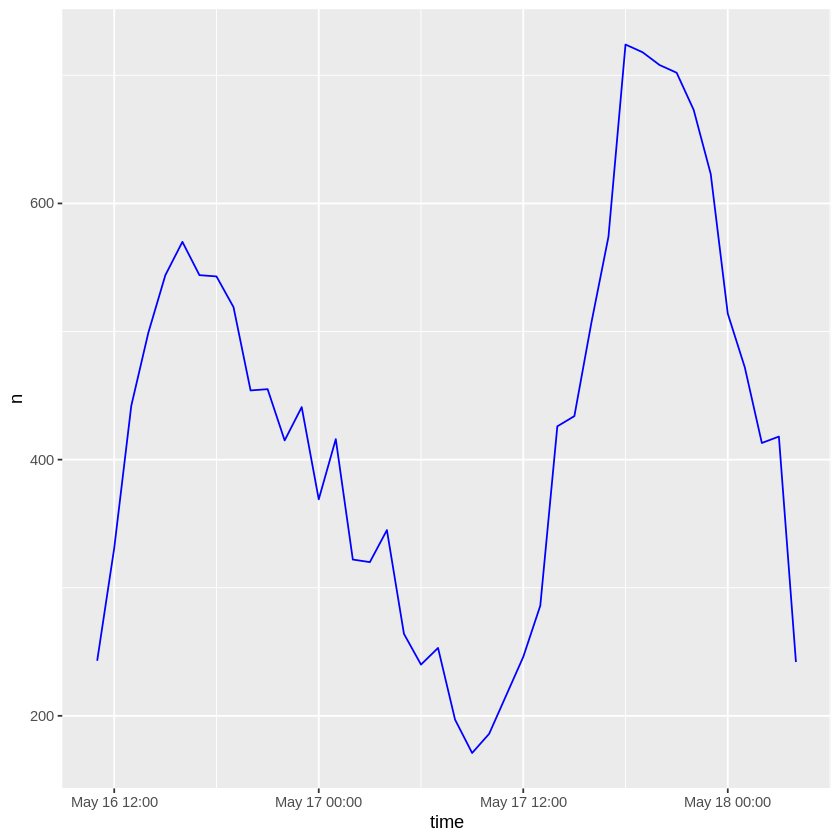

In [20]:
# Create a time series plot
ts_plot(tesladf, by = "hours", color = "blue")

We see tweets for Tesla fluctuating from high to low and then reaching a high again between 17 and 18 May after a big dip on 17 May. The high number of tweets could be related to an event or topic about Tesla's products.

#### **3b) Compare brand salience for two brands using time series plots and tweet frequencies**

Let's compare how tweets mentioning `"Toyota"` compare against `"Tesla"` - here is the `search_tweets()` code used to get tweets on `"Toyota"`

```R
# Extract tweets for Toyota using `search_tweets()`

tweets_toyo = search_tweets("toyota", n = 18000, lang = "en",  include_rts = FALSE)

fwrite(tweets_toyo, file = "toyotadf.csv")
```


In [21]:
# Import extracted tweets on `"toyota"` in CSV format
toyotadf = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/toyotadf.csv?raw=true")


In [23]:
# Explore the tweet dataframe for toyota
dim(toyotadf)
head(toyotadf$created_at, 10)

[1] 17798    90

[1] 2020-05-18T05:09:56Z 2020-05-18T05:08:31Z 2020-05-13T09:53:36Z
 [4] 2020-05-18T05:08:04Z 2020-05-18T05:07:59Z 2020-05-17T19:34:43Z
 [7] 2020-05-18T05:07:49Z 2020-05-13T09:02:07Z 2020-05-13T09:18:42Z
[10] 2020-05-18T05:07:31Z
17313 Levels: 2020-05-12T04:44:52Z 2020-05-12T04:44:53Z ... 2020-05-18T05:09:56Z

We can see the extracted tweets on `toyota` and the `created_at` column has the timestamp.

In [24]:
# Update dates in `created_at` column with the new date format
toyotadf$created_at <- as.POSIXct(toyotadf$created_at, format = "%Y-%m-%dT%H:%M:%SZ", tz="GMT")
# View the `created_at` column again
head(toyotadf$created_at, 10)

 [1] "2020-05-18 05:09:56 GMT" "2020-05-18 05:08:31 GMT"
 [3] "2020-05-13 09:53:36 GMT" "2020-05-18 05:08:04 GMT"
 [5] "2020-05-18 05:07:59 GMT" "2020-05-17 19:34:43 GMT"
 [7] "2020-05-18 05:07:49 GMT" "2020-05-13 09:02:07 GMT"
 [9] "2020-05-13 09:18:42 GMT" "2020-05-18 05:07:31 GMT"


To visualize the number of tweets over time, we aggregate both `toyotadf` and `tesladf` into time series objects using `ts_data()` which takes in 2 arguments:
* The data frame being converted
* `by`: The time interval of frequency counting (here `'hours'`)


In [32]:
# Create a time series object for Tesla at hourly intervals
tesla_ts <- ts_data(tesladf, by = "hours")
# View the time series object
head(tesla_ts)

time,n
<dttm>,<int>
2020-05-16 11:00:00,243
2020-05-16 12:00:00,331
2020-05-16 13:00:00,442
2020-05-16 14:00:00,499
2020-05-16 15:00:00,544
2020-05-16 16:00:00,570


In [33]:
# Rename the two columns in the time series object
names(tesla_ts) <- c("time", "tesla_n")
# View the output
head(tesla_ts)

time,tesla_n
<dttm>,<int>
2020-05-16 11:00:00,243
2020-05-16 12:00:00,331
2020-05-16 13:00:00,442
2020-05-16 14:00:00,499
2020-05-16 15:00:00,544
2020-05-16 16:00:00,570


In [26]:
# Create a time series object for Toyota at hourly intervals
toyo_ts <- ts_data(toyotadf, by = "hours")
# Rename the two columns in the time series object
names(toyo_ts) <- c("time", "toyo_n")
# View the output
head(toyo_ts)

time,toyo_n
<dttm>,<int>
2020-05-12 04:00:00,27
2020-05-12 05:00:00,87
2020-05-12 06:00:00,94
2020-05-12 07:00:00,162
2020-05-12 08:00:00,121
2020-05-12 09:00:00,116


We now have two time series objects with columns for time and tweet frequencies.

Merge the objects into a single data frame using the `merge()` function which is from the `reshape` library.

In [ ]:
# Load the required libraries
library(reshape)
library(ggplot2)

The `merge()` function takes 3 arguments:

* the time series objects to be merged 

* `by` argument which specifies the common column for merging

* `all` argument to instruct whether all the rows should be included

In [ ]:
# Merge the time series objects with "time" as the common column

# View few rows of the merged dataframe


We can see the tweet frqeuencies for tesla and toyota in separate columns.

Stack the tweet frequency counts into a single column and brands into another column using `melt()` from `reshape` library.

The `melt()` function takes 3 arguments:

* the dataframe to melt 

* `na.rm` to specify whether to include or exclude rows with missing values
* `id.vars` to specify the source columns to be retained (`time` in this case)

In [ ]:
# Stack the tweet frequency columns

# View the output


We can see that all columns other than `time` have been stacked and we have three columns now: `time`, `variable`, `value`. 

Plot the frequency of tweets on Tesla and Toyota using `ggplot()`.

Set the relevant column names i.e.  as values for the x-axis, y-axis, and color of the plot.  

In [ ]:
## Compare brand salience by plotting the frequency of tweets

# Plot frequency of tweets on Tesla and Toyota


#### It's interesting to see that there are relatively more tweets on Tesla than on Toyota. 

#### The higher level of tweet activity for Tesla indicates a stronger brand salience for Tesla than Toyota. 

#### Visualizing tweets through time series analysis provides good insights on interest level on a product and can be used to compare brand salience.

---
<center><h1> Q&A 3</h1> </center>

---

## **4. Understand brand perception through text mining and by visualizing key terms**



One of the most important and common tasks in social media data analysis is being able to understand what users are tweeting about the most and how they perceive a particular brand. 

In this section, we will visualize the most common words mentioning `"Tesla"` to build a word cloud that showcases the most common words.



### **4a) Processing tweets and twitter data**

Tweets are unstructured, noisy, and raw, and properly processing them is essentially to accurately capture useful brand-perception information. 

Here are some processing steps we will be performing:
* Step 1: Remove URLs from text
* Step 2: Remove special characters, punctuations, and numbers
* Step 3: Convert the text to a Corpus (i.e. large document of text)
* Step 4: Convert all letters in the Corpus to lower case
* Step 5: Remove common words (the, a, and ...), also called stop words, from the Corpus
* Step 6: Remove custom stop words from the Corpus
* Step 7: Trim leading and trailing spaces from Corpus

First, extract the tweets stored in the `text` column of the tweet dataframe for Tesla.

In [ ]:
# Extract tweet text from the Tesla dataset


We can see the first few rows of tweet text extracted from the main dataframe.

**Step 1: Remove URLs from text**

Use the `rm_twitter_url()` function from the `qdapRegex` library to remove all URLs from the text.

`rm_twitter_url()` takes the tweet text dataframe as input.

In [ ]:
# Load the library
library(qdapRegex)

In [ ]:
# Remove URLs from the tweet text and view the output


# View few rows of the dataframe


The URLs are removed from tweets: check records starting with "This article says VW beat Tesla..." and "Anyone up for some..." for example.

**Step 2: Remove special characters, punctuations, and numbers**

To remove special characters, punctuations, and numbers, we will use the `gsub()` function which takes in:

* The pattern to search for - for example, if we are searching for non-numbers and non-letters, the regular expression `"[^A-Za-z]"` is a pattern
* The character to replace it with
* The text source here `twt_txt_url`


In [ ]:
# Replace special characters, punctuation, & numbers with spaces

# View text after replacing special characters, punctuation, & numbers


In the output, we can see that all content other than letters has been replaced with spaces.

**Step 3: Building a Corpus**

A Corpus is a list of text documents and is often used in text processing functions. To create a corpus, we will be using the `tm` library and the functions `VectorSource()` and `Corpus()`. The `VectorSource()` converts the tweet text to a vector of texts and the `Corpus()` function takes the output of `VectorSource()` and converts to a Corpus. An example on a tweets object would be:


In [ ]:
# Convert processed text to a text corpus and view output



The text is stored under `content` within the corpus just created.

**Step 4: Convert Corpus to lower case**

To have all words in our corpus being uniform, we will lower all words in the Corpus to lower case (`'Tesla'` vs `'tesla'`). To do this, will use the `tm_map()` function which applies a transformation to the corpus. In this case, it takes in 2 arguments:
* The corpus being transformed
* The transformation itself, stored in the `tolower()` function


In [ ]:
# Convert the corpus to lowercase


# View the corpus after converting to lowercase


All characters in the corpus are now converted to lowercase.

**Step 5:  Remove stop words from the Corpus**

Stop words are commonly used words like `"a"`, `"an"`, `"the"` etc. They are often the most common words and tend to skew your analysis if left in the corpus. 

We will remove English stop words from the Corpus by using `tm_map()`which takes in this case 3 arguments:
* The corpus being transformed
* The transformation itself, stored in `removeWords()`
* The English stop words to be removed, stored in `stopwords("english")`


In [ ]:
# Remove English stop words from the corpus and view the corpus


# View the content column


The common stop words are now removed from the corpus.

**Step 6: Remove custom stop words from the Corpus**

In the corpus, frequently appearing terms like `tesla`, `sure`, `can`, `will`  etc do not add any value for analysis and can be removed to create a meaningul, refined corpus.

To do this, first extract a list of most frequent terms and their number of occurrences (also called term frequency) using the `freq_terms()` function from `qdap` library. `freq_terms()` takes two arguments: 
* The corpus 
* The top `"n"` terms to be extracted based on the number of occurrences


In [ ]:
# Load the library qdap


# Extract term frequencies for top 60 words in the Corpus and view the output



We can see high frequencies for custom stop words like `tesla`, `s`, `t`, `elon` (`elon musk` is retained).

Create of vector of such high frequency custom stop words.

In [ ]:
# Create a vector of custom stop words
custom_stopwds <- c("tesla", "s", "t", "will", "elon", "can", "like", "just", "musk", 
                    "one", "m",  "get", "now", "cars", "amp", "re", "go", "even", "via")

Apply `tm_map()` and `removeWords()` functions on the corpus to remove the custom stop words. `tm_map()` takes 3 arguments: 
* The corpus
* `removeWords()`
* The vector of custom stop words

In [ ]:
# Remove custom stop words and create a refined corpus

# View the text corpus after removing custom stop words


You can see that the corpus now has only important terms as the common and user-defined custom stop words have been removed.

Check the frequently occuring top 60 words again to see if we get a different list.

In [ ]:
# Extract term frequencies for the top 60 words

# View the output


**Step 7: Trim leading and trailing spaces from Corpus**

To remove additional spaces and create a clean corpus, use the `tm_map()` which takes two arguments: 

* The Corpus
* `stripWhitespace()` which collapses multiple spaces to a single space

In [ ]:
# Remove additional spaces from the corpus

# View the text corpus after removing spaces


The additional spaces are now removed from the corpus.

### **4b) Visualizing brand perception**

The most frequently used words in tweets are typically popular terms relevant to the topic tweeted.

In this exercise, we will extract and visualize popular terms in our refined corpus using the word cloud.


**Identify top 15 words spoken about the brand**

Extract and view the term frequency for the top 15 words from the refined corpus.

In [ ]:
# Extract term frequencies for the top 15 words


The popular terms related to tweets on Tesla can be seen here.

The brand promotion team can analyze these terms to understand the pulse of the audience.



In [ ]:
# Identify terms with more than 60 counts from the top 15 list



**Visualize popular terms with word clouds**

A word cloud is an image made up of words in which the size of each word indicates its frequency.


The `wordcloud()` function from the `wordcloud` library is used to create word clouds and it takes the following arguments:

* The Corpus
* `min.freq` set to include only terms with a minimum frequency
* `color` set to "red"
* `scale` set to the range of font sizes
* `random.order` set to FALSE to fix the word pattern in the word cloud

The `RColorBrewer()` library provides some interesting color palettes to work with.

In [ ]:
# Load libraries
library(wordcloud)
library(RColorBrewer)

In [ ]:
# Create a word cloud in red with min frequency of 100


A word cloud highlighting high-frequency words in large font sizes is displayed as output.

We can see that 'elonmusk' stands out as the most popular term. Also, terms like 'car', 'buy', 'spacex' are the other popular ones.

We can choose a color palette from the `RColorBrewer` library to make the word cloud colorful.

Assign "6" colors from the “Dark2” palette of `brewer.pal()` and set the `max.words` argument to "50" to plot a word cloud of the top 50 words.

In [ ]:
# Create word cloud with 6 colors and max 50 words


We now have an interesting word cloud depicting popular terms from tweets on Tesla positioned at the centre of the word cloud to highlight their relevance and importance.

One can use word cloud as an effective promotional image for marketing campaigns as it communicates the brand messaging and highlights popular terms to convey the value of the content being shared.


---
<center><h1> Q&A 4</h1> </center>

---

## 5.	**Further understanding brand perception by analyzing tweet sentiments**

Sentiment analysis is the process of retrieving information about a consumer's perception of a product or brand.

It is used to extract and quantify positive, negative, and neutral opinions as well as emotions like trust, joy, and anger from the text.

Steps involved in performing sentiment analysis:

* Step 1: Extract tweets on topic of interest

* Step 2: Extract sentiment scores from tweet text

* Step 3: Visualize sentiment scores and interpret customer perceptions

**Step 1: Extract tweets on topic of interest**

To explore customer's sentiments on Tesla, import a smaller tweet dataset extracted from Twitter.

In [ ]:
# Load a smaller dataset for tesla
tesladf_small <- read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/tesla_small.csv?raw=true", stringsAsFactors=FALSE)

In [ ]:
# Explore the tweet dataframe


**Step 2: Extract sentiment scores from tweet text**

The `get_nrc_sentiment()` function from the `syuzhet` package is used to extract sentiment scores for the text and it takes the column storing the tweet text as the argument.

In [ ]:
# Load library
library(syuzhet)

# Perform sentiment analysis for tweets on `tesla` 


In [ ]:
# View the sentiment scores for first 10 tweets


The sentiment scores for the first 10 records are displayed here with the rows and columns representing the tweets and the emotions respectively. 

The column values are the sentiment scores for the tweets against each emotion.

Get the sum of the sentiment scores for each emotion using `colSums()` and convert the output to a dataframe. `colSums()` takes the extracted sentiment scores as input.

In [ ]:
# Calculate sum of sentiment scores


# Convert the sum of scores to a dataframe


# View the dataframe


The aggregated scores for each sentiment is displayed here.

The score of 146 for anger indicates that 146 words in the corpus were classified under the emotion anger by the sentiment libraries.

Convert the rownames containing the sentiment heads into a column and use `cbind()` to combine this column with the sentiment scores.

Also, set the row names for this new dataframe to `"NULL"`.

In [ ]:
# Convert row names into 'sentiment' column and combine with sentiment scores

# View the dataframe


We can now see a data frame with sentiments in one column and their respective scores in the second column.

**Step 3: Visualize sentiment scores and interpret customer perceptions**

X-axis and Y-axis take the values `"sentiment"` and `"score"` respectively and fill is set to `"sentiment"`.

In [ ]:
# Plot the sentiment scores


It is interesting to see that the positive sentiments collectively outnumber the negative ones. The high score on positive emotions, trust, and anticipation augurs well for the brand.

Sentiment analysis is useful in social media monitoring since it gives an overview of people's sentiments.


---
<center><h1> Q&A 5</h1> </center>

---